### Importing Neccessary Libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


### Loading the dataset

In [87]:
data= pd.read_csv('Advertising.csv')

In [88]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [89]:
data.shape

(200, 5)

#### In our dataset, we have 200 rows of data and 5 columns

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


#### For double checking purpose, verifying there is no missing values

In [91]:
missing_data = data.isnull().sum()
print(missing_data)

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


#### Since there is one column named as "unnamed" which is  unnecessary, so we can drop it out.

In [92]:
data=data.drop(columns=['Unnamed: 0'],axis=1)

In [93]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### Checking is there any duplicated data 

In [94]:
data.duplicated().sum()
# There are no duplicates in the data

0

## Exploratory Data Analysis

In [95]:
print(data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


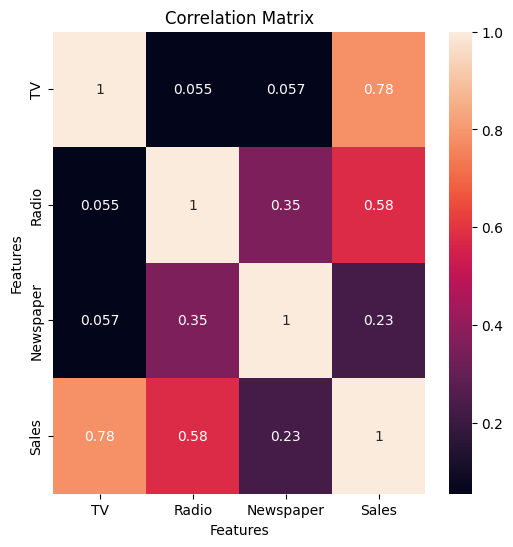

In [96]:
corr_matrix= data.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

##### Strongest Correlation: TV advertising and Sales (0.782224). This suggests us that TV advertising has the most significant impact on sales among the three advertising channels. Overall, if amount spent on TV advertising increases, sales also tend to increase.
##### Moderate Correlation: Radio advertising and Sales (0.576223). Radio also has a noticeable impact on sales, but less so than TV.
##### Weakest Correlation: Newspaper advertising and Sales (0.228299). Newspaper advertising seems to have the least impact on sales.

### Scatter-Plot

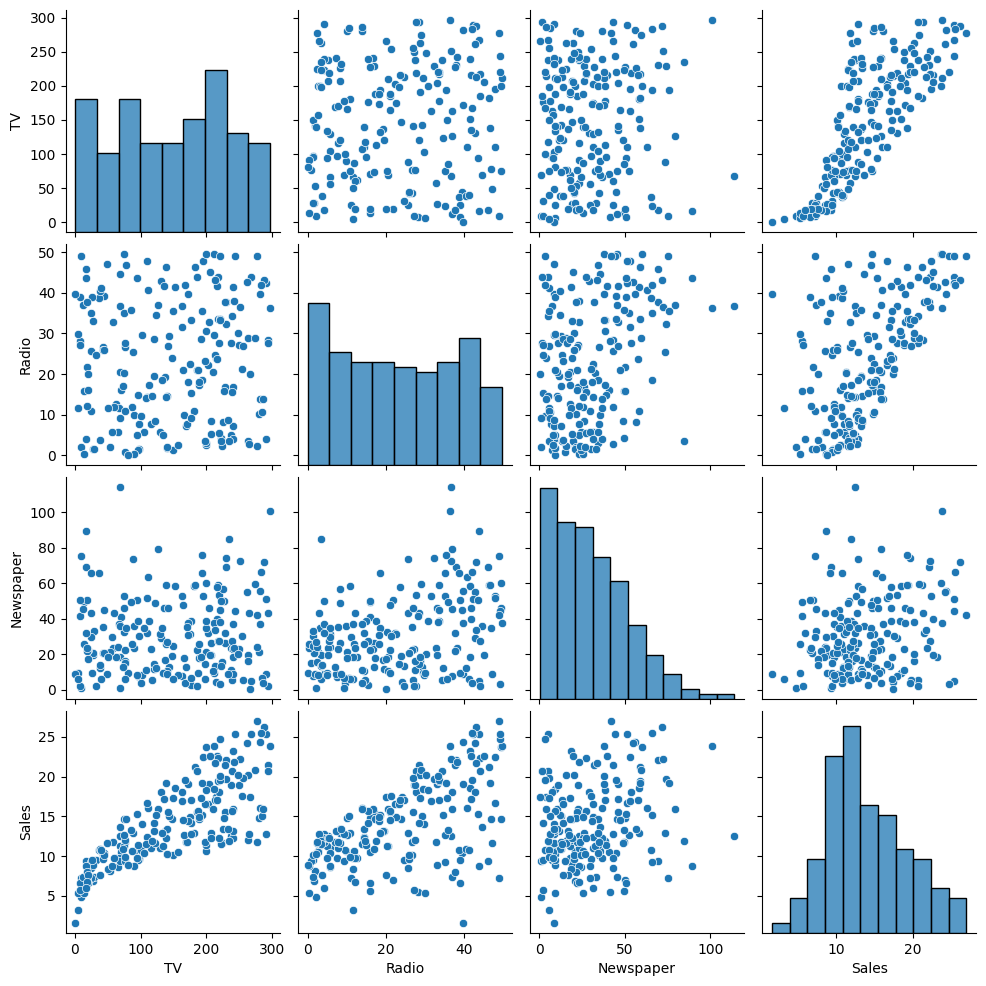

In [97]:
sns.pairplot(data)
plt.show()

In [98]:
numerical_columns= data.columns.to_list()
numerical_columns

['TV', 'Radio', 'Newspaper', 'Sales']

### Histogram and Boxplot

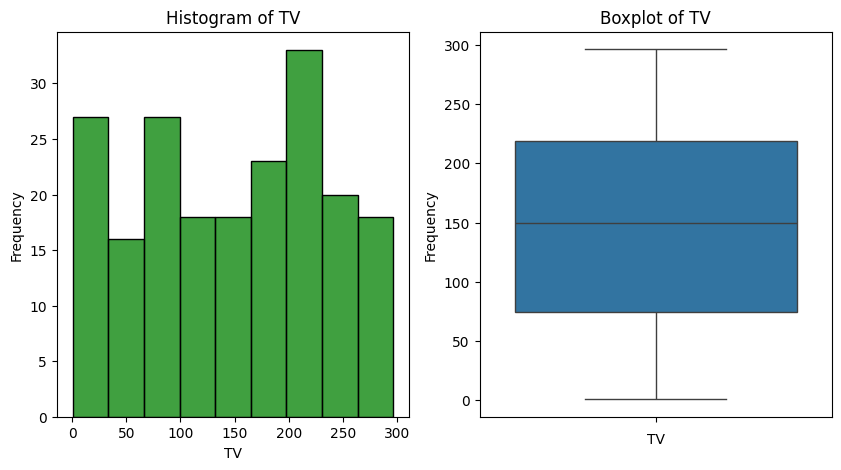

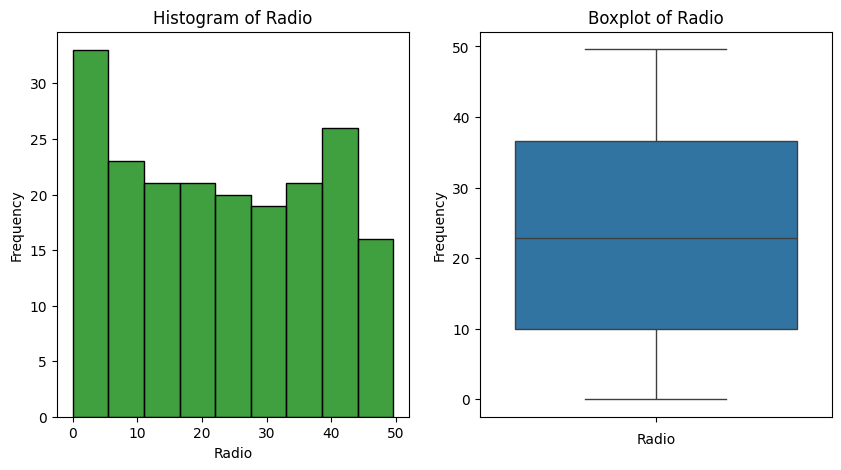

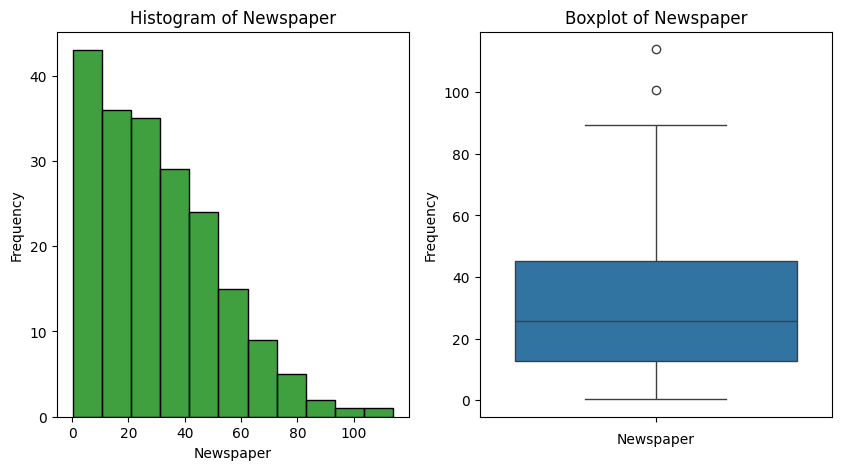

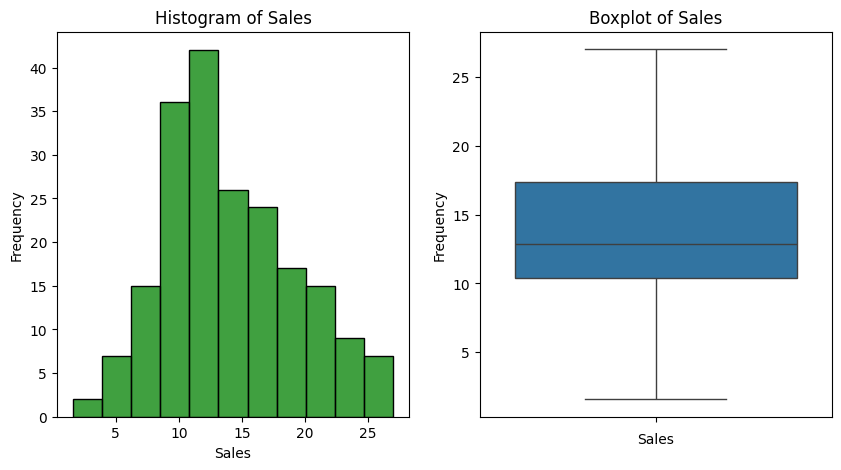

In [99]:
for col in numerical_columns:
    fig, ax= plt.subplots(1,2, figsize=(10,5))

    sns.histplot(data[col],kde=False, color= 'green', ax=ax[0])
    ax[0].set_title('Histogram of {}'.format(col))
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Frequency')

    sns.boxplot(data[col], ax=ax[1])
    ax[1].set_title('Boxplot of {}'.format(col))
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('Frequency')
    plt.show()
    

## Feature Scaling

In [100]:
scalar= StandardScaler()
scaled_data= scalar.fit_transform(data)
scaled_data

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00,
         1.55205313e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01,
        -6.96046111e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00,
        -9.07405869e-01],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00,
         8.60330287e-01],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00,
        -2.15683025e-01],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00,
        -1.31091086e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01,
        -4.27042783e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01,
        -1.58039455e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00,
        -1.77205942e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01,
        -6.57617064e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01,
        -1.04190753e+00],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00,
      

### Splitting into target features and other data columns

In [101]:
target= data['Sales']
data= data.drop(columns=['Sales'], axis=1)

In [102]:
target

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [103]:
data

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


## Splitting the data into training and testing data

In [104]:
x_train, x_test, y_train, y_test= train_test_split(data, target, test_size=0.2, random_state=42)

In [105]:
x_train

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


## Linear Regression Model

In [106]:
from sklearn.linear_model import LinearRegression

## Model Training

In [107]:
Linear_reg= LinearRegression()
Linear_reg.fit(x_train, y_train)

LinearRegression()

In [108]:
y_pred_train= Linear_reg.predict(x_train)
y_pred_test= Linear_reg.predict(x_test)

## Model Evaluation

In [109]:
training_error_mse= mean_squared_error(y_train, y_pred_train)
testing_error_mse= mean_squared_error(y_test, y_pred_test)
training_error_r2= r2_score(y_train, y_pred_train)
testing_error_r2= r2_score(y_test, y_pred_test)

### Printing the metric

In [111]:
print(f"Training MSE: {training_error_mse:.4f}")
print(f"Testing MSE: {testing_error_mse:.4f}")
print(f"Training R2 Score: {training_error_r2:.4f}")
print(f"Testing R2 Score: {testing_error_r2:.4f}")

Training MSE: 2.7051
Testing MSE: 3.1741
Training R2 Score: 0.8957
Testing R2 Score: 0.8994
